
--- Sample(10) ---
     sepal_length  sepal_width  petal_length  petal_width        iris_type
14            5.8          4.0           1.2          0.2      Iris-setosa
98            5.1          2.5           3.0          1.1  Iris-versicolor
75            6.6          3.0           4.4          1.4  Iris-versicolor
16            5.4          3.9           1.3          0.4      Iris-setosa
131           7.9          3.8           6.4          2.0   Iris-virginica
56            6.3          3.3           4.7          1.6  Iris-versicolor
141           6.9          3.1           5.1          2.3   Iris-virginica
44            5.1          3.8           1.9          0.4      Iris-setosa
29            4.7          3.2           1.6          0.2      Iris-setosa
120           6.9          3.2           5.7          2.3   Iris-virginica

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null

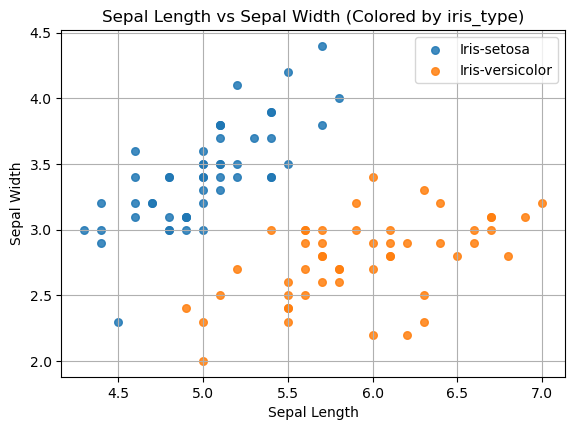

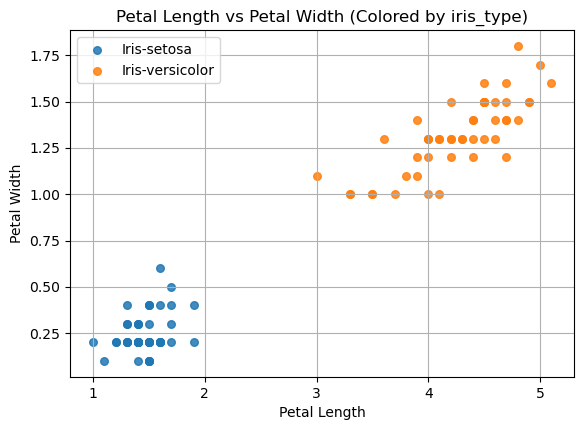

In [9]:
# =========================================================
# 1.2 Assignment - Iris EDA
# =========================================================

import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6.5, 4.5)

# ---- Absolute path ----
FILE_PATH = r"C:\Users\MasterDanteDev86\Downloads\CAP350-O Deep Learning - Online\W1\DPL\data\iris.csv"

# ---- Load and preview ----
df = pd.read_csv(FILE_PATH)

print("\n--- Sample(10) ---")
print(df.sample(10, random_state=1))

print("\n--- DataFrame Info ---")
print(df.info())

# ---- Column names in this CSV - verified ----
# Features: sepal_length, sepal_width, petal_length, petal_width
# Label:    iris_type, values: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
label_col = "iris_type"

# ---- Drop 'Virginica' ----
df_bin = df[~df[label_col].str.contains("virginica", case=False, na=False)].copy()

print("\n--- Class counts AFTER dropping 'Virginica' ---")
print(df_bin[label_col].value_counts())

# ---- Class imbalance check ----
vc = df_bin[label_col].value_counts()
print("\n--- Binary Class Counts ---")
print(vc)

if len(vc) == 2:
    smaller = int(min(vc.iloc[0], vc.iloc[1]))
    larger  = int(max(vc.iloc[0], vc.iloc[1]))
    ratio = smaller / larger if larger != 0 else 0.0
    print("\nTotal rows:", int(vc.sum()))
    print("Balance ratio (smaller/larger):", round(ratio, 3))
    if ratio >= 0.9:
        print("The classes are well balanced.")
    elif ratio >= 0.7:
        print("Mild imbalance.")
    else:
        print("Noticeable imbalance.")
else:
    print("Need exactly 2 classes after drop.")

# ---- Two different scatterplots ----
def simple_scatter(d, x, y, c):
    classes = d[c].unique()
    for name in classes:
        part = d[d[c] == name]
        plt.scatter(part[x], part[y], s=30, alpha=0.85, label=str(name))
    def pretty(s): return s.replace("_", " ").title()
    plt.xlabel(pretty(x))
    plt.ylabel(pretty(y))
    plt.title(f"{pretty(x)} vs {pretty(y)} (Colored by {c})")
    plt.grid(True)
    plt.legend()
    plt.show()

# Pair 1: sepal_length vs sepal_width
simple_scatter(df_bin, "sepal_length", "sepal_width", label_col)

# Pair 2: petal_length vs petal_width
simple_scatter(df_bin, "petal_length", "petal_width", label_col)

# =========================================================
# Answers as comments:
# Q1: How balanced are the two classes?
# A1: After dropping Virginica, both classes end up with the same number of rows
#     (50 each in this file), so there isn’t any real imbalance to worry about.

# Q2: Which feature pair shows the best separation?
# A2: The petal measurements look way more spread apart than the sepal ones.
#     So petal_length vs petal_width is the easier pair to separate.

# Q3: Does the data appear linearly separable?
# A3: The petal plot basically looks like you could draw a straight line between
#     the two groups. Not perfect, but pretty close.

# Q4: What challenges might a simple model (like a perceptron) face?
# A4: There are still a couple of points that overlap a bit. Also if we only used
#     sepal measurements, the classes mix more, so the model might struggle.
# =========================================================
